# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from plot_config import *

%matplotlib inline

## Utils

In [2]:
def plot_box(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    figsize=(11, 6), dpi=200
):
    values = []
    for size in sizes:
        group = df[df[size_key] == size]
        values.append(group[target_key])
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if tick_labels is None:
        tick_labels = sizes
    
    ax.boxplot(values, tick_labels=tick_labels)
    
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

In [3]:
def plot_line(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    figsize=(11, 6), dpi=200
):
    values = []
    for size in sizes:
        group = df[df[size_key] == size]
        values.append(group[target_key].mean())
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if tick_labels is None:
        tick_labels = sizes
    
    ax.plot(values, marker='o', markersize=12, color='black', linewidth=1.5)
    
    ax.set_xticks(np.arange(len(tick_labels)))
    ax.set_xticklabels(tick_labels)
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin * .95, ymax * 1.05)
    
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

In [4]:
def plot_lines(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    title=None, figsize=(11, 6), dpi=200
):  
    fig, ax = plt.subplots(figsize=figsize)
    
    if title is not None:
        ax.set_title(title, weight='bold')

    for i, (partition, group) in enumerate(df.groupby('partition (MB)')):
        values = group[group['run'] == 'mean'][target_key].values
        ax.plot(
            values, marker=markers[i], markersize=10, 
            linewidth=1.5, label=f'{partition}MB'
        )
    
    if tick_labels is None: tick_labels = sizes
    ax.set_xticks(np.arange(len(tick_labels)))
    ax.set_xticklabels(tick_labels)
    
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin * .95, ymax * 1.1)
    
    if x_label is not None: ax.set_xlabel(x_label)
    if y_label is not None: ax.set_ylabel(y_label)
        
    ax.legend(ncols=2)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

# Visualization

## Varying data sizes

In [16]:
df = pd.read_csv('./results/result_stats_adjusted.csv')
df.head(3)

,partition (MB),data (GB),run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps,total_bits,num_worlds,total_duration (s),inference_duration (s)
0,25,1.0,1,5.60,732451.57,5.499780e+08,8.601656e+09,41.0,20.02,15.64
1,25,1.0,2,5.73,732451.57,5.614658e+08,8.601656e+09,41.0,19.76,15.32
2,25,1.0,3,5.51,714586.74,5.557523e+08,8.391859e+09,41.0,20.42,15.10


In [17]:
data_sizes =['1GB', '2GB', '4GB', '6GB', '8GB','10GB', 'total']
data_sizes_num =[1, 2, 4, 6, 8, 10, 12.6]

### Total_cpu_time

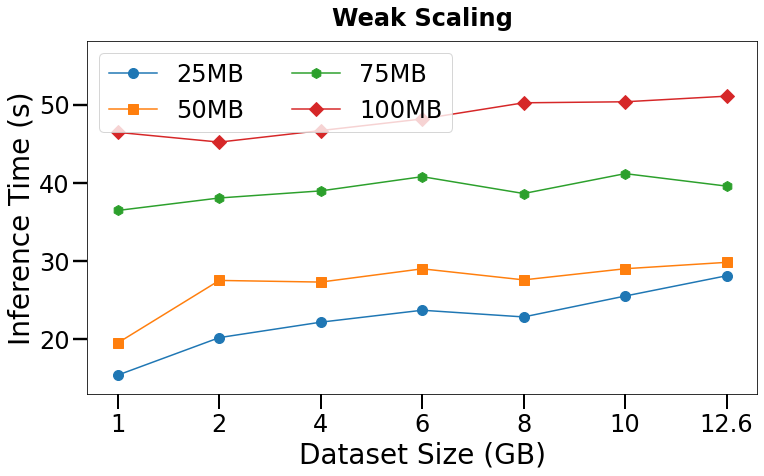

In [18]:
plot_lines(
    df, 'data (GB)', data_sizes, tick_labels=data_sizes_num,
    target_key='inference_duration (s)', figsize=(12, 6.5),
    title='Weak Scaling',
    save_filename='figures/inference_time.jpg',
    x_label='Dataset Size (GB)', y_label='Inference Time (s)'
)

### throughput_bps

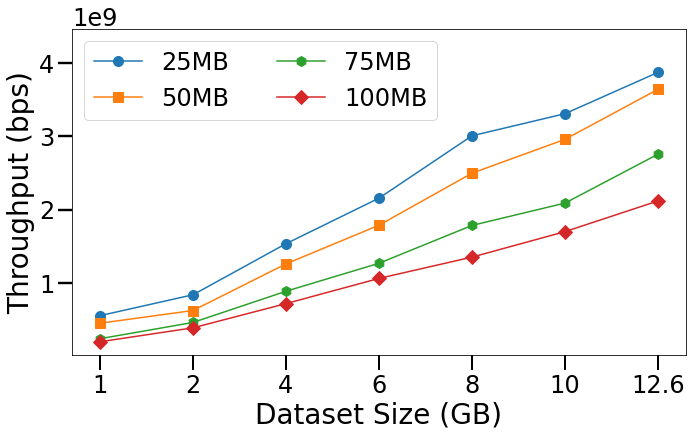

In [19]:
plot_lines(
    df, 'data (GB)', data_sizes, tick_labels=data_sizes_num,
    target_key='throughput_bps',
    save_filename='figures/throughput.jpg',
    # title='Throughput for Different Parition Sizes',
    x_label='Dataset Size (GB)', y_label='Throughput (bps)'
)

## Varying batch sizes

In [10]:
df = pd.read_csv('./results/batch_varying_adjusted.csv')
df.head(3)

,batch_size,run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps,total_bits,num_worlds,total_duration (s),inference_duration (s)
0,32,1,8.38,732937.88,2.722905e+08,8.601656e+09,41.0,39.20,31.59
1,32,2,8.12,732938.32,2.569192e+08,8.601656e+09,41.0,38.12,33.48
2,32,3,8.28,732938.08,2.216350e+08,8.601656e+09,41.0,47.25,38.81


In [11]:
batch_sizes = [32, 64, 128, 256, 512]

### total_cpu_time

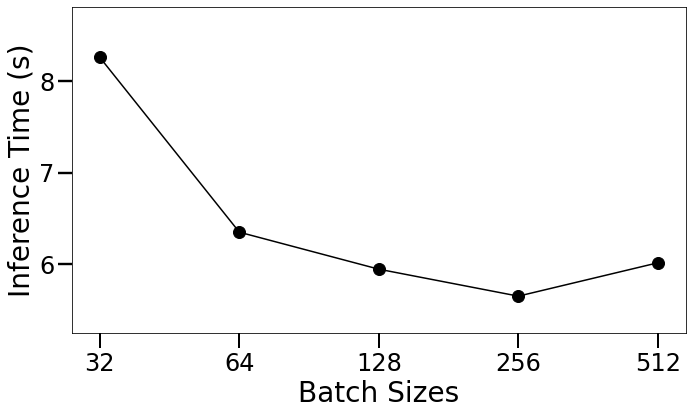

In [12]:
plot_line(
    df, 'batch_size', batch_sizes, 
    target_key='total_cpu_time (seconds)',
    save_filename='figures/batch_varying_inference_time.jpg',
    x_label='Batch Sizes', y_label='Inference Time (s)'
)

### throughput_bps

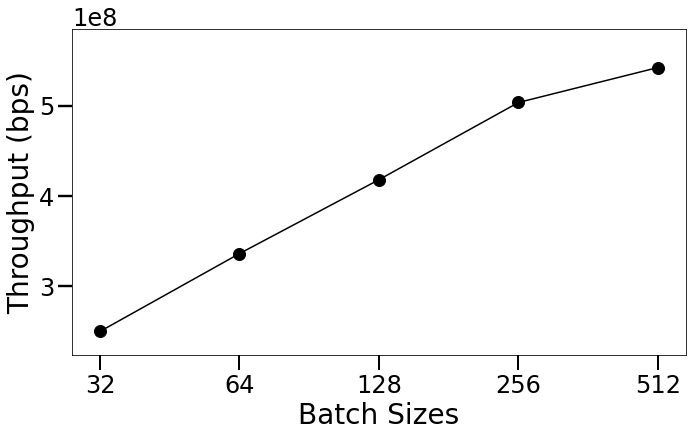

In [13]:
plot_line(
    df, 'batch_size', batch_sizes, 
    target_key='throughput_bps',
    save_filename='figures/batch_varying_throughput.jpg',
    x_label='Batch Sizes', y_label='Throughput (bps)'
)